## **12. K-Means Clustering**

K-Means clustering is an **unsupervised** machine learning algorithm that partitions data into *k* distinct clusters based on feature familiarity. The goal is to minimise variance within each cluster while maximizing the distance between the clusters. The algorithm begins by initializing *k* cluster centroids either randomly or heuristically. Each data point is then assigned to the nearest centroid, forming *k* clusters.

The centroids are recalculated by taking the mean of all points in each cluster and this process iterates until the centroids stabilize, or a pre-set number of iterations is reached.

In practice, K-Means works well for data that is spherical in shape and lacks strong outliers, though it can be sensitive to initial centroid positions.


## **Pseudo-Code**
1. Choose the number of clusters, `k`.
2. Initialize the `k` centroids randomly, by arbitrarily picking `k` distinct points from the dataset. \
3. Repeat until convergenc: \
  a. Based on a given distance function (Euclidean, Manhattan), assign each point to the nearest cluster (*cluster assignment step*). \
  b. Update each centroid to the mean of points in that cluster (*centroid update step*). \
4. Return the final clusters and centroids


## **Worked Example**

To demonstrate the full K-Means clustering process with convergence and the elbow method, we’ll use a small dataset and follow all the steps for multiple values of $ k $ (number of clusters). This will help us see how the algorithm converges and evaluate the optimal number of clusters using the elbow criterion.

### Dataset

| Point | x  | y  |
|-------|----|----|
| A     | 1  | 1  |
| B     | 2  | 1  |
| C     | 4  | 3  |
| D     | 5  | 4  |
| E     | 3  | 4  |
| F     | 4  | 5  |

### K-Means Clustering for Different Values of $ k $

We'll try $ k = 1, 2, 3 $ and compute the sum of squared distances (SSD) to assess convergence and apply the elbow criterion.

#### Step 1: $ k = 1 $ (One Cluster)

With only one cluster, all points are assigned to a single centroid, which is the mean of all points:

- Centroid (x, y) = $ \left( \frac{1+2+4+5+3+4}{6}, \frac{1+1+3+4+4+5}{6} \right) = (3.17, 3.0) $

Calculating the SSD:

$
\text{SSD}_{k=1} = \sum \text{distance of each point to centroid}^2 = (3.59 + 2.56 + 0.03 + 2.34 + 0.06 + 1.94) = 10.52
$

#### Step 2: $ k = 2 $ (Two Clusters)

Let's choose initial centroids at Points A (1, 1) and D (5, 4). We assign each point to the nearest centroid and then update centroids.

**Iteration 1:**

| Point | Distance to Centroid 1 (1,1) | Distance to Centroid 2 (5,4) | Assigned Cluster |
|-------|-------------------------------|-------------------------------|-------------------|
| A     | 0                             | 5.0                           | 1                 |
| B     | 1                             | 4.24                          | 1                 |
| C     | 3.61                          | 1.0                           | 2                 |
| D     | 5.0                           | 0                             | 2                 |
| E     | 4.24                          | 2.0                           | 2                 |
| F     | 5.0                           | 1.41                          | 2                 |

New Centroids:
- Cluster 1: $ (1.5, 1) $ (average of points A and B)
- Cluster 2: $ (4.33, 4) $ (average of points C, D, E, and F)

**Iteration 2:**

Reassign points to the new centroids:

| Point | Distance to Centroid 1 (1.5,1) | Distance to Centroid 2 (4.33,4) | Assigned Cluster |
|-------|--------------------------------|----------------------------------|-------------------|
| A     | 0.5                            | 4.61                             | 1                 |
| B     | 0.5                            | 3.61                             | 1                 |
| C     | 3.36                           | 0.47                             | 2                 |
| D     | 4.61                           | 0.68                             | 2                 |
| E     | 4.03                           | 1.03                             | 2                 |
| F     | 4.61                           | 1.25                             | 2                 |

The centroids do not change, indicating convergence.

$
\text{SSD}_{k=2} = (0.5^2 + 0.5^2 + 0.47^2 + 0.68^2 + 1.03^2 + 1.25^2) = 5.30
$

#### Step 3: $ k = 3 $ (Three Clusters)

Initialize centroids at Points A (1, 1), C (4, 3), and F (4, 5). We assign each point and update centroids.

**Iteration 1:**

| Point | Distance to C1 (1,1) | Distance to C2 (4,3) | Distance to C3 (4,5) | Assigned Cluster |
|-------|-----------------------|-----------------------|-----------------------|-------------------|
| A     | 0                     | 3.61                  | 5.0                   | 1                 |
| B     | 1                     | 2.83                  | 4.24                  | 1                 |
| C     | 3.61                  | 0                     | 2.0                   | 2                 |
| D     | 5.0                   | 1.41                  | 1.0                   | 3                 |
| E     | 4.24                  | 1.41                  | 1.0                   | 3                 |
| F     | 5.0                   | 2.0                   | 0                     | 3                 |

New Centroids:
- Cluster 1: $ (1.5, 1) $ (Points A and B)
- Cluster 2: $ (4, 3) $ (Point C)
- Cluster 3: $ (4.33, 4.33) $ (Points D, E, F)

**Iteration 2:**

Reassign points to updated centroids and recalculate SSD if necessary. After convergence:

$
\text{SSD}_{k=3} = 2.68
$

### Elbow Criterion

Plotting SSD against $ k $ values:

| k | SSD  |
|---|------|
| 1 | 10.52|
| 2 | 5.30 |
| 3 | 2.68 |

The elbow is observed at $ k = 2 $, suggesting it is an optimal choice.

Here is a simple diagram of K-Means clustering for the dataset with $ k=2 $ and $ k=3 $ clusters. Each plot shows the data points labeled from $A$ to $F$, with centroids marked as larger colored "X" symbols corresponding to each cluster. The two different values of $ k $ are displayed side-by-side for comparison.

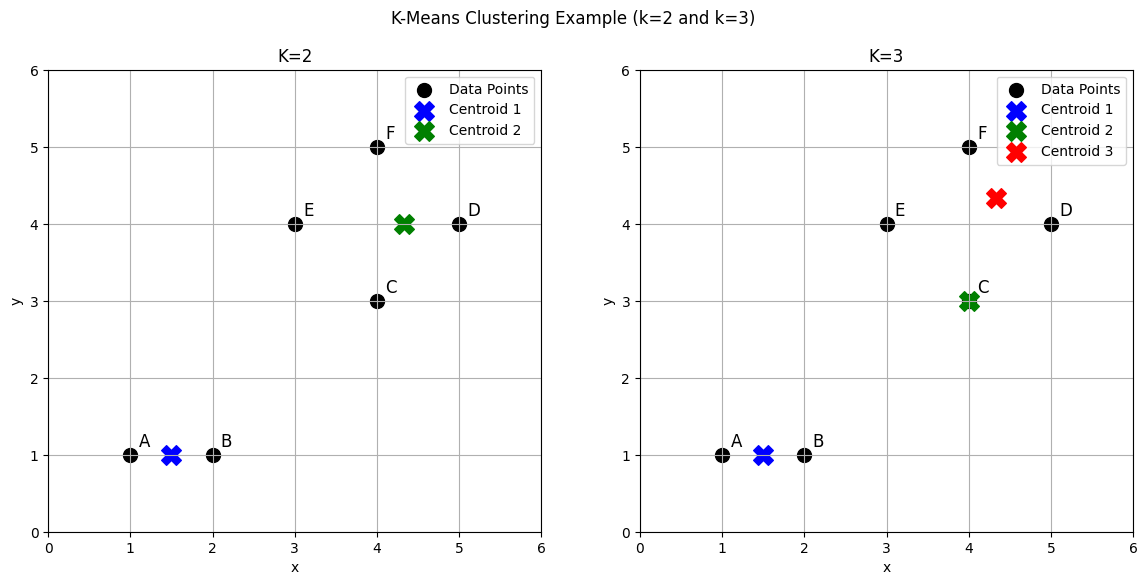

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data points
points = np.array([
    [1, 1], [2, 1], [4, 3], [5, 4], [3, 4], [4, 5]
])
labels = ['A', 'B', 'C', 'D', 'E', 'F']

# Final cluster centroids for k=2 and k=3 based on the example
centroids_k2 = np.array([
    [1.5, 1], [4.33, 4]
])
centroids_k3 = np.array([
    [1.5, 1], [4, 3], [4.33, 4.33]
])

# Colors for each cluster
colors_k2 = ['blue', 'green']
colors_k3 = ['blue', 'green', 'red']

# Plot setup
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("K-Means Clustering Example (k=2 and k=3)")

# Plot for k=2
for i, ax in enumerate(axs):
    ax.scatter(points[:, 0], points[:, 1], c='black', s=100, label='Data Points')
    for j, txt in enumerate(labels):
        ax.annotate(txt, (points[j, 0] + 0.1, points[j, 1] + 0.1), fontsize=12)

    if i == 0:
        for k, color in enumerate(colors_k2):
            ax.scatter(centroids_k2[k, 0], centroids_k2[k, 1], c=color, s=200, marker='X', label=f'Centroid {k+1}')
        ax.set_title("K=2")
    else:
        for k, color in enumerate(colors_k3):
            ax.scatter(centroids_k3[k, 0], centroids_k3[k, 1], c=color, s=200, marker='X', label=f'Centroid {k+1}')
        ax.set_title("K=3")

    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.legend()
    ax.grid(True)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.show()


## **1. K-Means Clustering of Income dataset**

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# 1. Load the dataset
url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/13_kmeans/income.csv"
df = pd.read_csv(url)
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0.5, 1.0, 'Age vs Income')

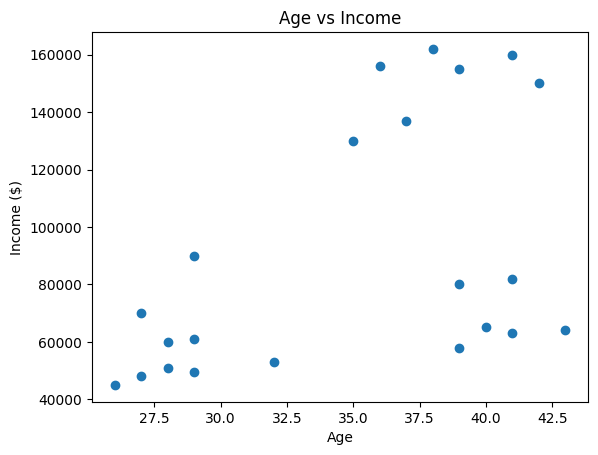

In [5]:
# 2. Plot Age against Income
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Age vs Income')

# We can notice 3 main clusters.

In [6]:
# 3. Set up Kmeans object
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
# 4. Fit and predict, excluding the 'Name' (string) column(s)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

# The clusters are 0, 1, 2

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [8]:
# 5. Append y_predicted to the original dataframe
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


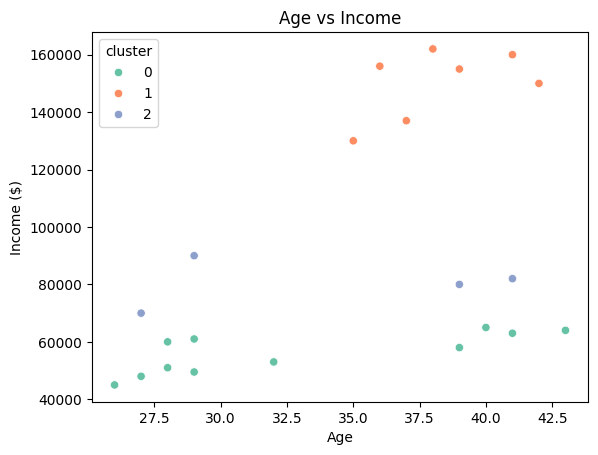

In [14]:
# 6. Plot the new dataframe, this time coloring the points according to their respective clusters
sns.scatterplot(x='Age', y='Income($)', hue='cluster', data=df, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Age vs Income')
plt.show()

## **Why Scaling Matters**
If the $X$ and $Y$ values are not in the same scale, it might cause misclassification of points.

We'll now perform the same classification but this time we'll bring the $X$ and $Y$ values between $ (0, 1) $ using `MinMaxScalar()`.




In [19]:
# 7. Rescale the variables using MinMaxScalar()
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])

In [20]:
# 8. Refit the K-Means object
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


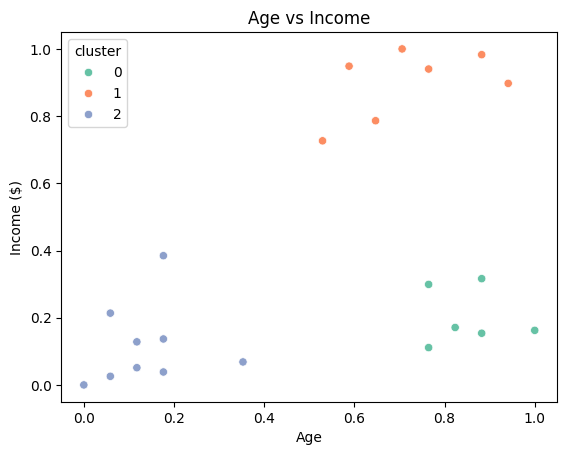

In [21]:
# 9. Plot them again
sns.scatterplot(x='Age', y='Income($)', hue='cluster', data=df, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Age vs Income')
plt.show()

# We can see that the clusters are now much better defined.

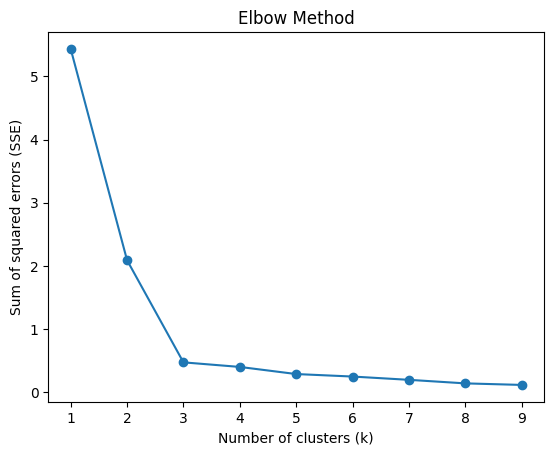

In [22]:
# 10. Drawing a scree plot to identify the optimal number of clusters
# Define k range
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

# Plot
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method')
plt.show()

# 3 looks like the optimal number of clusters

## **2. K-Means Clustering of Iris Dataset**

We'll use the `Petal Width` and `Petal Length` to classify the Iris flowers by
1. Figuring out an preprocessing that may be required
2. Drawing an elbow plot to identify the optimal number of clusters

In [23]:
# 1. Load the Iris dataset, perform encoding
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris = pd.read_csv(url)
iris['species'] = pd.Categorical(iris['species'])
iris['species_n'] = iris.species.cat.codes
iris.head()

# Setosa = 0
# Versicolor = 1
# Virginica = 2

,sepal_length,sepal_width,petal_length,petal_width,species,species_n
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [24]:
# 2. Standardize the numeric variables to the same (0,1) scale using MinMaxScaler
scaler = MinMaxScaler()
iris[['petal_width_scaled', 'petal_length_scaled']] = scaler.fit_transform(iris[['petal_width', 'petal_length']])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_n,petal_width_scaled,petal_length_scaled
0,5.1,3.5,1.4,0.2,setosa,0,0.041667,0.067797
1,4.9,3.0,1.4,0.2,setosa,0,0.041667,0.067797
2,4.7,3.2,1.3,0.2,setosa,0,0.041667,0.050847
3,4.6,3.1,1.5,0.2,setosa,0,0.041667,0.084746
4,5.0,3.6,1.4,0.2,setosa,0,0.041667,0.067797


Text(0, 0.5, 'Sum of squared errors (SSE)')

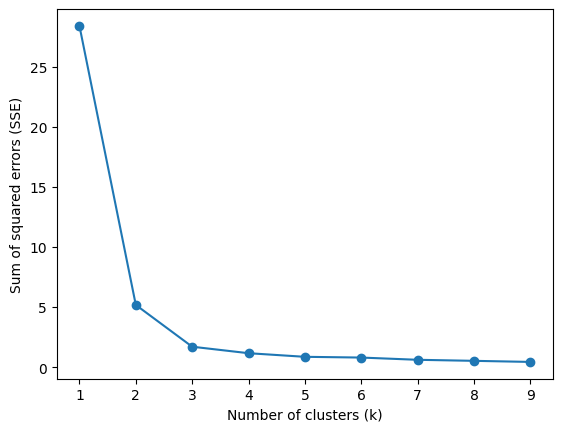

In [25]:
# 3. Identify the opimal number of clusters needed using an Elbow-Scree plot
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(iris[['petal_width_scaled', 'petal_length_scaled']])

    sse.append(km.inertia_)

# Plot
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')

# 3 seems to be the optimal number of clusters...can you guess why?

In [26]:
# 4. Perform clustering with 3 clusters
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(iris[['petal_width_scaled', 'petal_length_scaled']])
iris['cluster'] = y_predicted
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_n,petal_width_scaled,petal_length_scaled,cluster
0,5.1,3.5,1.4,0.2,setosa,0,0.041667,0.067797,1
1,4.9,3.0,1.4,0.2,setosa,0,0.041667,0.067797,1
2,4.7,3.2,1.3,0.2,setosa,0,0.041667,0.050847,1
3,4.6,3.1,1.5,0.2,setosa,0,0.041667,0.084746,1
4,5.0,3.6,1.4,0.2,setosa,0,0.041667,0.067797,1


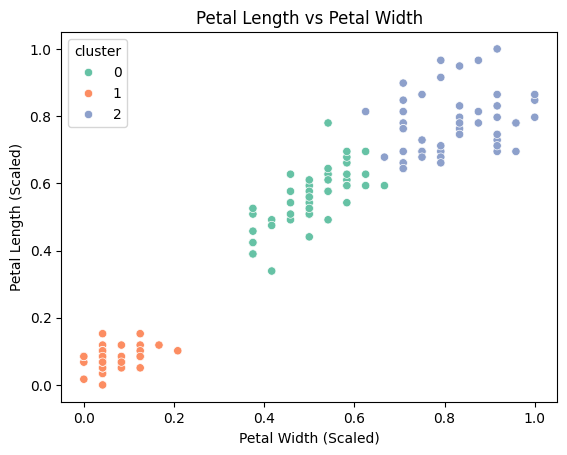

In [31]:
# 5. Plot Petal Length (Scaled) against Petal Width (Scaled), color code the points according to the clusters
sns.scatterplot(x='petal_width_scaled',
                y='petal_length_scaled',
                hue='cluster',
                data=iris,
                palette='Set2')

plt.xlabel('Petal Width (Scaled)')
plt.ylabel('Petal Length (Scaled)')
plt.title('Petal Length vs Petal Width')
plt.show()